### Cosine similarity basic 2d

Vector 1: [-1.0000000e+00  1.2246468e-16], Cosine Similarity: -1.0000
Vector 2: [-0.89473684  0.44659376], Cosine Similarity: -0.8947
Vector 3: [-0.78947368  0.61378441], Cosine Similarity: -0.7895
Vector 4: [-0.68421053  0.72928455], Cosine Similarity: -0.6842
Vector 5: [-0.57894737  0.81536491], Cosine Similarity: -0.5789
Vector 6: [-0.47368421  0.88069476], Cosine Similarity: -0.4737
Vector 7: [-0.36842105  0.92965904], Cosine Similarity: -0.3684
Vector 8: [-0.26315789  0.96475278], Cosine Similarity: -0.2632
Vector 9: [-0.15789474  0.98745595], Cosine Similarity: -0.1579
Vector 10: [-0.05263158  0.998614  ], Cosine Similarity: -0.0526
Vector 11: [0.05263158 0.998614  ], Cosine Similarity: 0.0526
Vector 12: [0.15789474 0.98745595], Cosine Similarity: 0.1579
Vector 13: [0.26315789 0.96475278], Cosine Similarity: 0.2632
Vector 14: [0.36842105 0.92965904], Cosine Similarity: 0.3684
Vector 15: [0.47368421 0.88069476], Cosine Similarity: 0.4737
Vector 16: [0.57894737 0.81536491], Cosine 

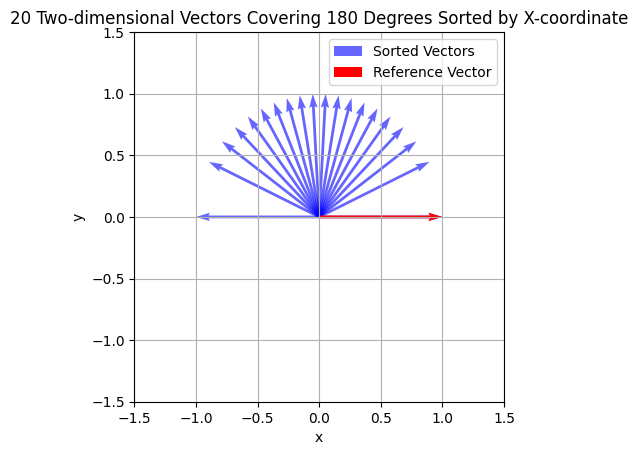

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_vectors = 20
cosine_similarities = np.linspace(-1, 1, num_vectors)
angles = np.arccos(cosine_similarities)

# Generate the reference vector
reference_vector = np.array([1, 0])

# Generate the vectors with the specified angles
vectors = np.array([[np.cos(angle), np.sin(angle)] for angle in angles])

# Sort the vectors based on their x-coordinates
sorted_indices = np.argsort(vectors[:, 0])
sorted_vectors = vectors[sorted_indices]

# Calculate the cosine similarities between each sorted vector and the reference vector
cosine_similarities_sorted = np.dot(sorted_vectors, reference_vector)

# Print the sorted vectors and their cosine similarities
for i, (vector, cosine_similarity) in enumerate(zip(sorted_vectors, cosine_similarities_sorted)):
    print(f"Vector {i + 1}: {vector}, Cosine Similarity: {cosine_similarity:.4f}")

# Plot the sorted vectors
plt.quiver(*np.zeros((2, num_vectors)), sorted_vectors[:, 0], sorted_vectors[:, 1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.6, label='Sorted Vectors')
plt.quiver(0, 0, *reference_vector, angles='xy', scale_units='xy', scale=1, color='r', lw=2, label='Reference Vector')

# Customize the plot
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('20 Two-dimensional Vectors Covering 180 Degrees Sorted by X-coordinate')
plt.grid(True)

# Show the plot
plt.show()

### Cosine similarity extension

In [2]:
import numpy as np

def generate_vector_with_cosine_similarity(ref_vector, cosine_similarity):
    dim = len(ref_vector)
    orthogonal_vector = np.random.randn(dim)
    orthogonal_vector -= orthogonal_vector.dot(ref_vector) * ref_vector / np.linalg.norm(ref_vector)**2
    orthogonal_vector /= np.linalg.norm(orthogonal_vector)
    
    new_vector = cosine_similarity * ref_vector + np.sqrt(1 - cosine_similarity**2) * orthogonal_vector
    return new_vector

num_vectors = 100
reference_vector = np.array([1., 0., 0, 0, 0, 0, 0, 0, 0, 0])  # 10-dimensional reference vector
reference_vector /= np.linalg.norm(reference_vector)

cosine_similarities = np.linspace(-1, 1, num_vectors)

vectors = np.zeros((num_vectors, 10))

for i, cosine_similarity in enumerate(cosine_similarities):
    vectors[i] = generate_vector_with_cosine_similarity(reference_vector, cosine_similarity)

# Sort the vectors based on their x-coordinates
sorted_indices = np.argsort(vectors[:, 0])
sorted_vectors = vectors[sorted_indices]

# Calculate the cosine similarities between each sorted vector and the reference vector
cosine_similarities_sorted = np.dot(sorted_vectors, reference_vector)

# Print the sorted vectors and their cosine similarities
for i, (vector, cosine_similarity) in enumerate(zip(sorted_vectors, cosine_similarities_sorted)):
    print(f"Vector {i + 1}: {vector}, Cosine Similarity: {cosine_similarity:.4f}")

Vector 1: [-1.  0.  0.  0.  0.  0. -0.  0.  0.  0.], Cosine Similarity: -1.0000
Vector 2: [-0.97979798  0.0464019   0.00954627 -0.14801302  0.08687391  0.01270619
  0.02395979 -0.03411737  0.03739438  0.07070268], Cosine Similarity: -0.9798
Vector 3: [-0.95959596 -0.10445877  0.03975121  0.03008954  0.03905458 -0.03794435
 -0.10358142 -0.00840847  0.17400585  0.14742978], Cosine Similarity: -0.9596
Vector 4: [-0.93939394  0.1833858  -0.08492876  0.17311563  0.02365589  0.17130461
  0.08064039  0.01728855 -0.04008944 -0.09172219], Cosine Similarity: -0.9394
Vector 5: [-0.91919192 -0.09117794  0.02430582  0.16458322  0.00678183  0.11383638
 -0.00299428 -0.01195826 -0.27351698  0.17642611], Cosine Similarity: -0.9192
Vector 6: [-0.8989899  -0.10386425  0.00754551  0.16699423  0.1874033  -0.15428692
  0.15322701  0.23426301 -0.11918122  0.03998855], Cosine Similarity: -0.8990
Vector 7: [-0.87878788 -0.17957557  0.07063787  0.20077192  0.03280355 -0.30601077
  0.15698714 -0.0872254   0.1349

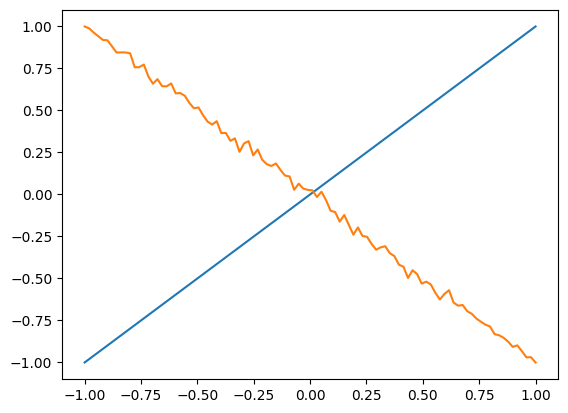

In [3]:
plt.plot(cosine_similarities_sorted, np.matmul(sorted_vectors, np.array([1., 0., -0., -0, 0., 0, 0, 0, 0, 0])[:,None]))
plt.plot(cosine_similarities_sorted, np.matmul(sorted_vectors, np.array([-1.0, 0., -0., -0, 0.1, 0, 0, 0, 0, 0])[:,None]))

### Cosine similarity

In [4]:
import numpy as np

def generate_vector_with_cosine_similarity(ref_vector, cosine_similarity):
    dim = len(ref_vector)
    orthogonal_vector = np.random.randn(dim)
    orthogonal_vector -= orthogonal_vector.dot(ref_vector) * ref_vector / np.linalg.norm(ref_vector)**2
    orthogonal_vector /= np.linalg.norm(orthogonal_vector)
    
    new_vector = cosine_similarity * ref_vector + np.sqrt(1 - cosine_similarity**2) * orthogonal_vector
    return new_vector

def normalize_vectors(vectors):
    return vectors / np.linalg.norm(vectors, axis=1, keepdims=True)

num_vectors = 20
reference_vector = np.random.rand(10)  # 10-dimensional random reference vector
reference_vector = normalize_vectors(reference_vector[np.newaxis, :])[0]  # Add an extra dimension, normalize and then remove the extra dimension
cosine_similarities = np.linspace(-1, 1, num_vectors)

vectors = np.zeros((num_vectors, 10))

for i, cosine_similarity in enumerate(cosine_similarities):
    vectors[i] = generate_vector_with_cosine_similarity(reference_vector, cosine_similarity)

# Sort the vectors based on their x-coordinates
sorted_indices = np.argsort(vectors[:, 0])
sorted_vectors = vectors[sorted_indices]

# Normalize the sorted vectors
normalized_sorted_vectors = normalize_vectors(sorted_vectors)

# Calculate the cosine similarities between each sorted vector and the reference vector
cosine_similarities_sorted = np.dot(normalized_sorted_vectors, reference_vector)
SortIDX = np.argsort(np.dot(normalized_sorted_vectors, reference_vector))
normalized_sorted_vectors= normalized_sorted_vectors[SortIDX].copy()
cosine_similarities_sorted = np.dot(normalized_sorted_vectors, reference_vector)


# Print the reference vector
print(f"Reference Vector: {reference_vector}")

# Print the sorted vectors and their cosine similarities
for i, (vector, cosine_similarity) in enumerate(zip(normalized_sorted_vectors, cosine_similarities_sorted)):
    print(f"Vector {i + 1}: {vector}, Cosine Similarity: {cosine_similarity:.4f}")

Reference Vector: [0.19930193 0.40400065 0.04225187 0.04134273 0.36767379 0.34029778
 0.41539946 0.40477058 0.3426003  0.29801055]
Vector 1: [-0.19930193 -0.40400065 -0.04225187 -0.04134273 -0.36767379 -0.34029778
 -0.41539946 -0.40477058 -0.3426003  -0.29801055], Cosine Similarity: -1.0000
Vector 2: [-0.01595301 -0.23078922 -0.03949336 -0.33804933 -0.34069569 -0.31285412
 -0.40614293 -0.5397416  -0.38645019 -0.10524584], Cosine Similarity: -0.8947
Vector 3: [-0.0972181  -0.47152841  0.21325086 -0.18052527 -0.59478952 -0.31009068
 -0.03532342 -0.35287361  0.00402887 -0.33827466], Cosine Similarity: -0.7895
Vector 4: [-0.3030658   0.3182239  -0.05573968 -0.20623469 -0.51336919 -0.1759031
 -0.2718393  -0.4441368  -0.35579071 -0.26270526], Cosine Similarity: -0.6842
Vector 5: [-0.06161265 -0.25511723  0.07921762  0.21025344 -0.14406323 -0.53386635
  0.25373356 -0.48955865 -0.51229503  0.09151531], Cosine Similarity: -0.5789
Vector 6: [ 0.23911495 -0.62666471 -0.1258414  -0.32152498 -0.201

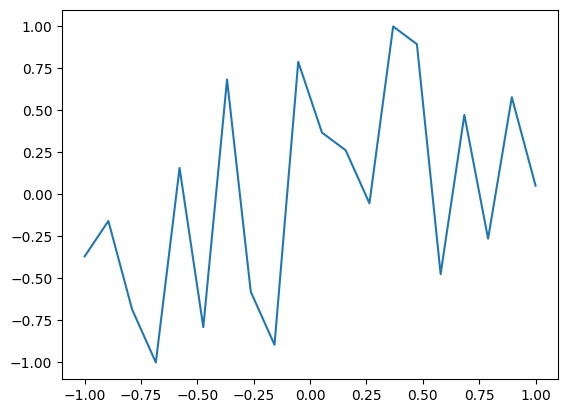

In [5]:
plt.plot(cosine_similarities_sorted, np.matmul(sorted_vectors, reference_vector[:,None]))

#### soft permutation entropy

In [7]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import itertools

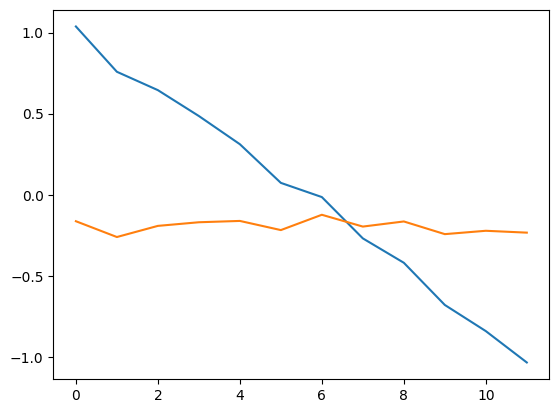

In [8]:
Rand = np.random.normal(0, 0.05, 12)
MonoInc = -np.linspace(-1, 1, 12) + Rand 
Horizon = np.ones(12)-0.2 + Rand
Horizon = np.zeros(12)-0.2 + Rand

window_size = 3

plt.plot(MonoInc)
plt.plot(Horizon)

In [9]:
def soft_rank(x, tau=1.0):
    x_exp = tf.expand_dims(x, -1)
    x_exp_t = tf.expand_dims(x, -2)
    pairwise_diff = x_exp - x_exp_t
    pairwise_rank = tf.math.sigmoid(-pairwise_diff / tau)
    rank = tf.reduce_sum(pairwise_rank, axis=-1)
    return rank

#x = Horizon.astype(np.float32)
x = MonoInc.astype(np.float32)
x_ = tf.signal.frame(x, window_size, 1)
Rank = soft_rank(x_, 0.02) + 0.5

Permutations = list(itertools.permutations(np.arange(1, window_size+1)))
Permutations = tf.constant(Permutations, dtype=tf.float32)

mvn = tfp.distributions.MultivariateNormalDiag(loc=Permutations[:, None], scale_diag=tf.ones(window_size))
#ProbSum = -tf.reduce_sum(mvn.log_prob(Rank[None]), axis=-1)
ProbSum = tf.reduce_sum(mvn.prob(Rank[None]), axis=-1)
NormProbSum =  ProbSum / tf.reduce_sum(ProbSum)
SoftPeEntropy =-1* tf.reduce_sum(NormProbSum * tf.math.log(NormProbSum))
SoftPeEntropy

<tf.Tensor: shape=(), dtype=float32, numpy=1.2159568>